In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread(r"E:\pythonProject\opencvProject\resources\y.png")[...,::-1]
print(img.shape)

(110, 108, 3)


1. **图像边界检测**
图像中加入了部分噪声，先对其平滑处理

(<matplotlib.axes._subplots.AxesSubplot at 0x23f62312c10>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

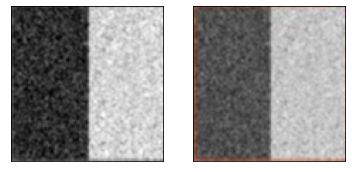

In [10]:
img_smooth=cv2.GaussianBlur(img,(3,3),0)
gray=cv2.cvtColor(img_smooth,cv2.COLOR_RGB2GRAY)
plt.subplot(121),plt.imshow(gray,'gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_smooth),plt.xticks([]),plt.yticks([])


1. **sobel、scharr、Laplacian**

In [15]:
sobelx_kernal3=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=float)
sobelx_kernal5=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=float)
# sobel
img_sobelx=cv2.filter2D(gray,-1,sobelx_kernal3)
img_sobely=cv2.Sobel(gray,-1,0,1,ksize=3)

# scharr
scharrx_kernal=np.array([[-3,0,3],[-10,0,10],[-3,0,3]],dtype=float)

img_scharrx=cv2.filter2D(gray,-1,scharrx_kernal)

# Laplacian
laplacian_kernal=np.array([[1,1,1],[1,-4,1],[1,1,1]],dtype=float)
img_laplacian=cv2.Laplacian(gray,-1,ksize=3)

2. **canny**

In [12]:
img_canny = cv2.Canny(gray,100,200)

(<matplotlib.axes._subplots.AxesSubplot at 0x23f633d1490>,
 Text(0.5, 1.0, 'canny'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

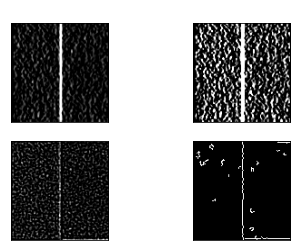

In [13]:
plt.subplot(221),plt.title("sobelx",color="w"),plt.imshow(img_sobelx,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.title("scharrx",color="w"),plt.imshow(img_scharrx,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.title("laplacian",color='w'),plt.imshow(img_laplacian,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.title("canny",color="w"),plt.imshow(img_canny,cmap='gray'),plt.xticks([]),plt.yticks([])

In [16]:
cv2.imshow("scharr",img_sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()

图像锐化


In [2]:
def sharpen(img):
    sharpen_kernal1=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    sharpen_kernal2=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    result=cv2.filter2D(img,-1,sharpen_kernal2)
    return result

In [3]:
img=cv2.imread("../resources/orange.jpg")
result=sharpen(img)
cv2.imwrite("../resources/result/orange_sharpen.jpg",result)
img=cv2.imread("../resources/apple.jpg")
result=sharpen(img)
cv2.imwrite("../resources/result/apple_sharpen.jpg",result)
cv2.imshow("sharpen",result)
cv2.waitKey(0)
cv2.destroyAllWindows()
